# Business Understanding

- Diabetes is a chronic metabolic disorder that affects how the body processes blood sugar (glucose). Glucose is the primary source of energy for the body's cells, but it needs insulin, a hormone produced by the pancreas, to enter the cells and be used for energy.


- The global diabetes medicine ***market size*** was valued at ***USD 52.9 billion in 2020*** and is projected to reach ***USD 78.3 billion by 2027***, growing at a CAGR of 5.7% from 2021 to 2027, according to a ***report by Grand View Research.***


## Importing  Libraries

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
from sklearn.svm import SVR
svr = SVR()
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score,confusion_matrix,mean_squared_error, mean_absolute_error, r2_score


## Loading Data

In [2]:
df=pd.read_csv('diabetes.csv')
df=df.drop("Unnamed: 0",axis=1)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Column Descriptions

**Pregnancies:** Number of times pregnant.


**Glucose:** It refers to the amount of sugar (glucose) present in the blood.


**BloodPressure:** It is a measurement of the force of blood against the walls of your arteries as it flows through your body.


**SkinThickness:** It refers to triceps skin fold thickness (mm) that assesses the amount of subcutaneous fat (fat just under the skin) on the back of the upper arm.


**Insulin:** It is a hormone produced by the pancreas that helps regulate blood sugar levels in the body.


**BMI:** BMI stands for Body Mass Index, which is a measurement that is used to assess whether an individual's weight is within a healthy range for their height.


**DiabetesPedigreeFunction:** It is a mathematical formula that is used to assess the risk of developing type 2 diabetes based on family history.


**Age:** Patient Age.


**Outcome:** Class variable (0 or 1) based on result.

## Data Dimension

In [5]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 768
Number of Cols: 9


## Data Types and Structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Check NA 

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Numerical Attributes

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Univariable Analysis  

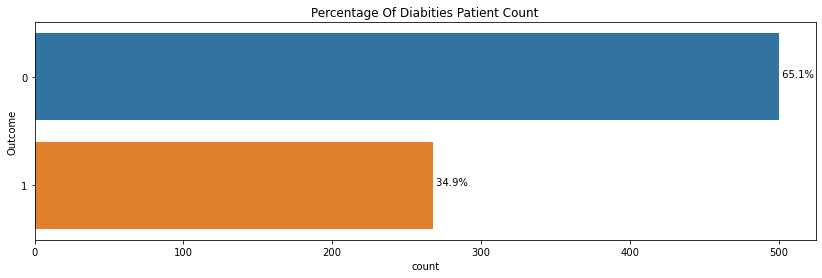

In [9]:
fig, ax = plt.subplots(figsize=(14,4))
plt.title("Percentage Of Diabities Patient Count")
ax = sns.countplot(y='Outcome', data=df, ax=ax);

total = df['Outcome'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- In binary classification tasks, imbalanced datasets occur when one class has significantly fewer samples than another (e.g., 80% of samples belong to Class A while only 20% belong to Class B). This phenomenon is also known as “class imbalance"
- As we can see, the 2 classes have different frequencies, so the **dataset is balanced.**

## Frequency Distribution

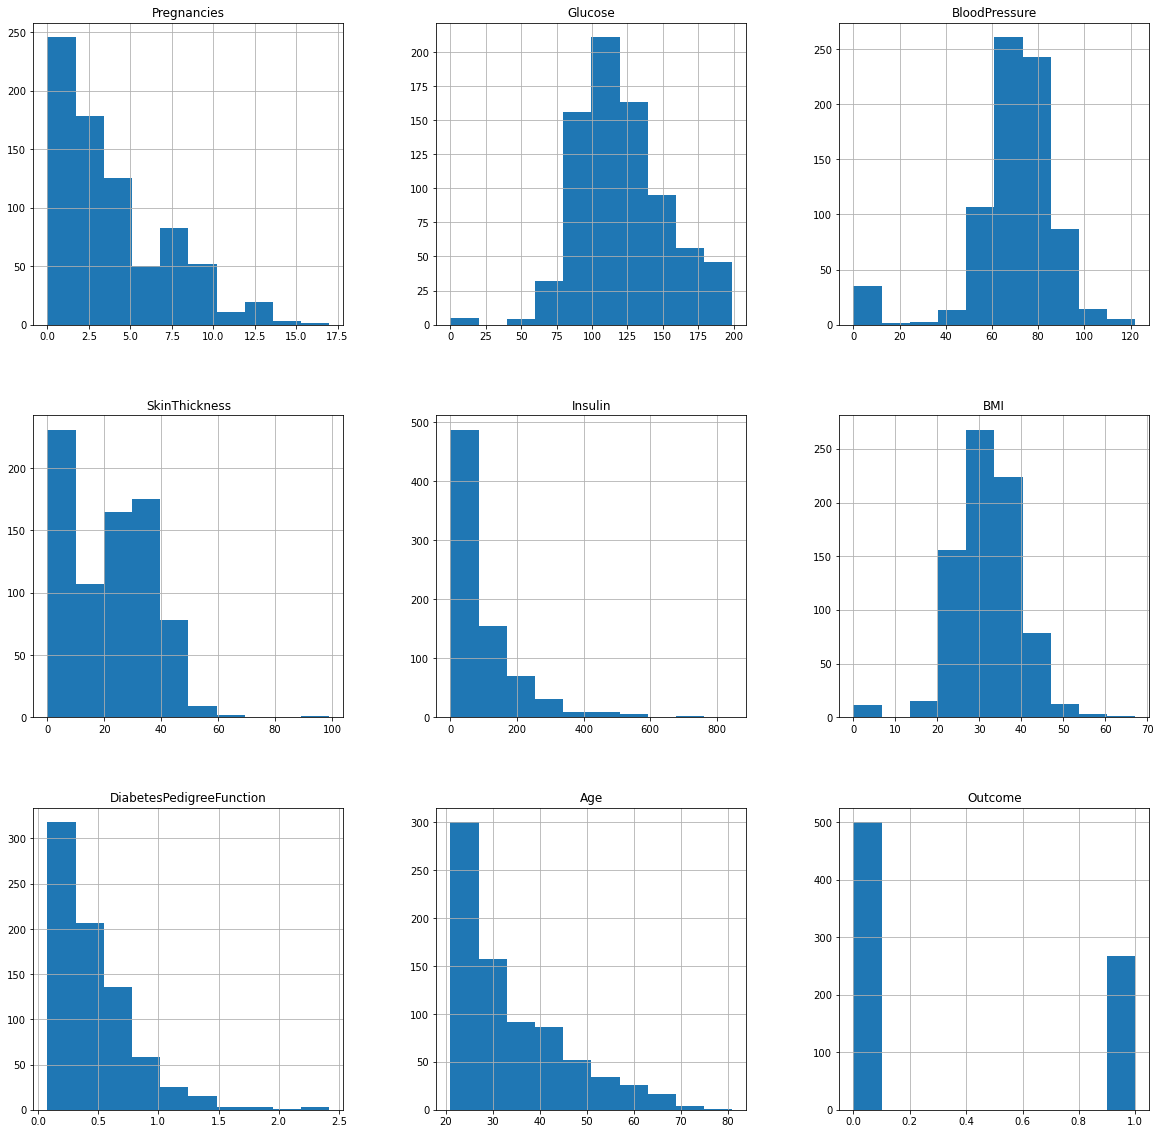

In [10]:
df.hist(figsize = (20,20))
plt.show()

## Numerical Analysis 

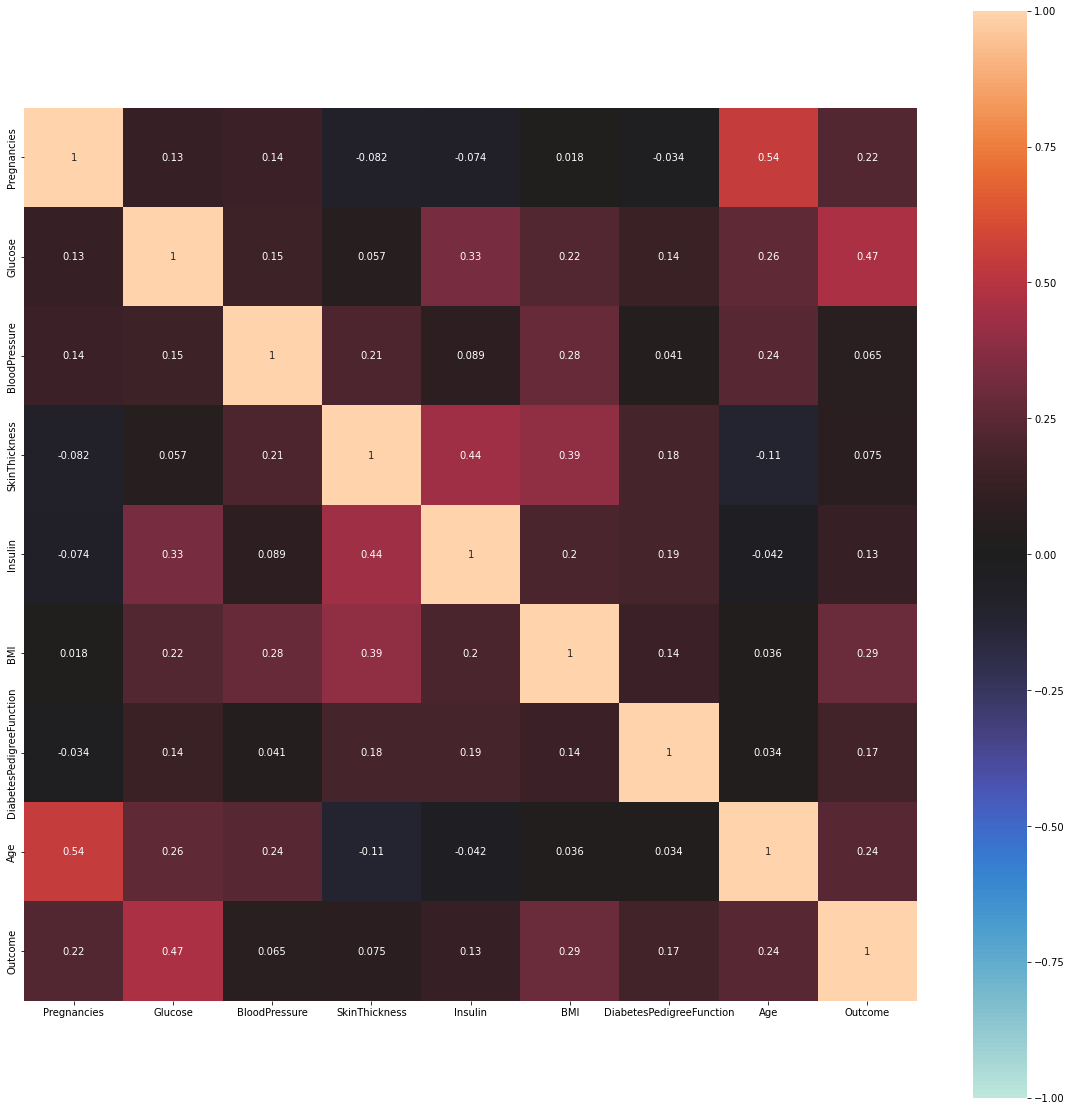

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, ax=ax, vmin=-1, center=0, vmax=1, square=True)
plt.show()

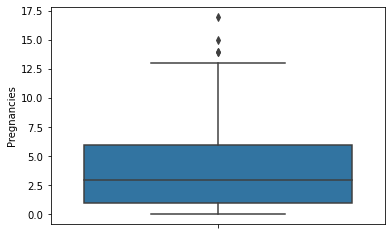

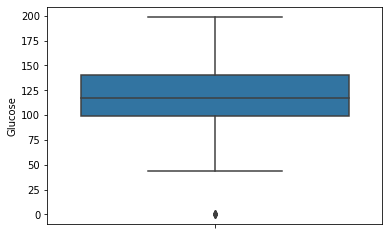

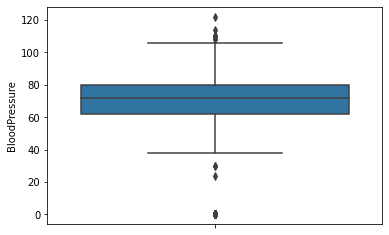

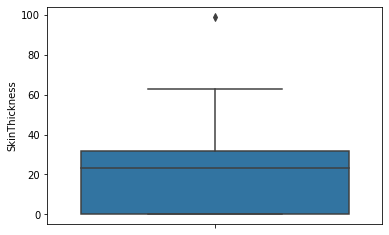

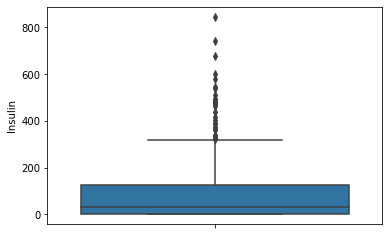

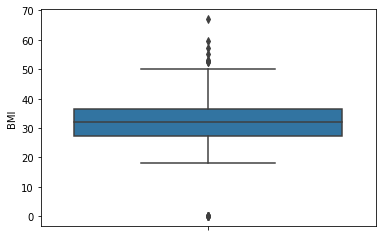

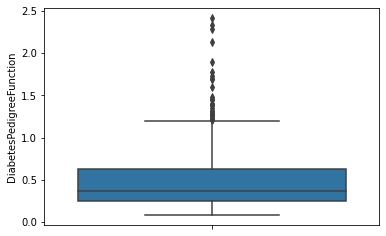

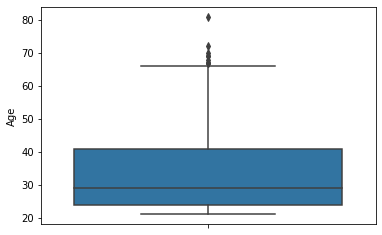

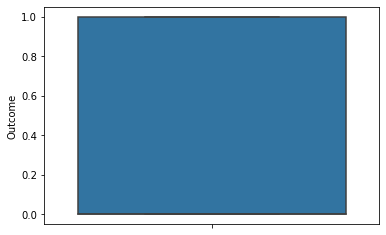

In [13]:
for col in df:
    sns.boxplot(y=col, data=df)
    plt.show()

## BMI relation

In [32]:
Withdiabities=df[df['Outcome']==1]
nodiabities=df[df['Outcome']==0]
avg=Withdiabities['BMI'].mean()
print(f'Average BMI with Diabities ={avg}')
max=Withdiabities['BMI'].max()
print(f'Average BMI with Diabities ={max}')

avg1=nodiabities['BMI'].mean()
print(f'Average BMI with NO Diabities ={avg1}')

max1=nodiabities['BMI'].max()
print(f'Average BMI with NO Diabities ={max1}')


Average BMI with Diabities =35.14253731343278
Average BMI with Diabities =67.1
Average BMI with NO Diabities =30.30419999999996
Average BMI with NO Diabities =57.3


- From above relation between with diabities person has **more BMI value** compare to Normal person.

## Bi-Variable Analysis

In [33]:
correlations = df.corr()['Outcome'].drop('Outcome')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

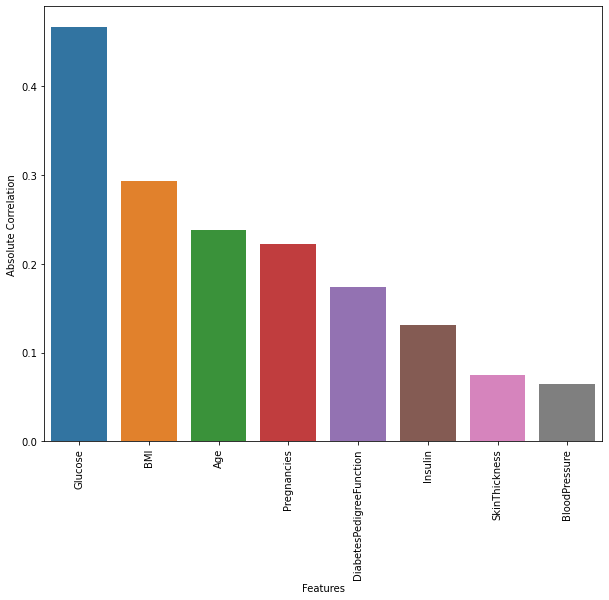

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

# Data Preparation 

## Spliting into Train, Test Data

In [39]:
X=df.iloc[:,0:-1].values
Y=df.iloc[:,-1].values

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [42]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Logistic Regression

In [43]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [44]:
Y_pred=classifier.predict(X_test)

In [21]:
confusion_matrix(y_test, Y_pred)

array([[70, 12],
       [12, 22]], dtype=int64)

In [48]:
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, Y_pred)
print("Precision :", precision)
recall = recall_score(y_test, Y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, Y_pred)
print("F1-score  :", F1_score)
confusion_mat=confusion_matrix(y_test, Y_pred)
print("Confusion Matrix  :\n",confusion_mat)

Accuracy   : 0.7552083333333334
Precision : 0.7368421052631579
Recall    : 0.5675675675675675
F1-score  : 0.6412213740458015
Confusion Matrix  :
 [[103  15]
 [ 32  42]]


# Support Vector Machine (SVM)

In [23]:
X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.25)
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [49]:
svr.fit(X_train, y_train)

SVR()

In [59]:
svr_pred = svr.predict(X_test)

In [62]:
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print("Support Vector Regression (SVR):")
print("MSE: ", svr_mse)
print("MAE: ", svr_mae)
print("R-squared: ", svr_r2)

Support Vector Regression (SVR):
MSE:  0.16755851275734424
MAE:  0.292266521671492
R-squared:  0.29261600844173874


# Decision Tree Classifier 

In [65]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [66]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.635


- The accuracy on the training set using the decision tree classifier is 100

- While the accuracy of the test set is much worse. This is an indication that the tree is suffering from over-adjustment

* overfitting , It does not generalize well to new data. Therefore, we need to apply pre-pruning
  on the tree
  

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [70]:
number_of_trees=[5,6,7,8,9,10,11,12,15]
maximum_number_of_features=["sqrt","log2"]
criterion=["gini","entropy"]
maximum_depth=[5,6,7,8,9,10]
minimum_sample_split=[4,5,6,7,8,9,10]

In [71]:
random_grid={'n_estimators':number_of_trees,
             'max_features':maximum_number_of_features,
             'criterion':criterion,
             'max_depth':maximum_depth,
             'min_samples_split':minimum_sample_split}

In [72]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid, n_iter=12, cv=5)

In [73]:
final_rfc=RandomForestClassifier(n_estimators=100, min_samples_split=10, max_features="log2",max_depth=10, criterion="gini")

In [75]:
final_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=10)

In [76]:
Y_pred1=final_rfc.predict(X_test)

In [80]:
print(classification_report(y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       118
           1       0.70      0.57      0.63        74

    accuracy                           0.74       192
   macro avg       0.73      0.71      0.71       192
weighted avg       0.74      0.74      0.73       192

